### ==============================================================================
### WORKERS COMPENSATION FUND OF TANZANIA - AI TRAINING
### MODULE 2: END-TO-END MACHINE LEARNING PROJECT
### PROJECT: FORECASTING ANNUAL DISABLING CLAIM VOLUME
### ==============================================================================

We will use historical data from 1968-2023 to build a model that predicts the **Accepted disabling claims** for the next year (e.g., 2024).
- Accurately forecasting claim volume is crucial for annual budgeting, resource planning, and staffing at the WCF.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some default styles for our plots for better readability
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


#### Step 1: Look at the Big Picture
Before writing a single line of ML code, we must understand the objective.
- Business Objective: To provide an accurate, data-driven forecast of the annual number of accepted disabling claims to help WCF leadership with budgeting and resource allocation.
- Machine Learning Frame:
  - Type: Supervised Learning. We have historical data with the "correct answers" (the actual number of claims each year).
  - Task: Regression (specifically, Time Series Forecasting). We are predicting a number.
  - Learning: Batch Learning. We will train the model on all available historical data at once.
- Performance Measure: We need a way to measure how "good" our model is. For regression, a standard metric is the Root Mean Square Error (RMSE). This will tell us, on average, how many claims our forecast is off by. A lower RMSE is better.

In [3]:
# Load the dataset from the CSV file
file_path = './dataset/aggregate_annual_claims.csv'
claims = pd.read_csv(file_path)

# Display the first 5 rows to see what the data looks like
print("First 5 rows of the dataset:")
display(claims.head())

# Display the last 5 rows to see the time range
print("\nLast 5 rows of the dataset:")
display(claims.tail())

First 5 rows of the dataset:


,Year,Subject employers,Subject employees,Accepted disabling claims,Est. accepted nondisabling claims,Est. total accepted claims,Denied claims,Disabling claim denial rate,Fatality claims,Net PTD claims,Rate: accepted disabling claims per 100 employees,"Rate: fatality claims per 100,000 employees",Aggravation claims: Accepted disabling,Aggravation claims: Denied disabling,Disabling claims: median days to insurer acceptance,Disabling claims: median days to insurer denial,Disabling claims: Percent accepted or denied timely,Disabling claims: Percent with first payment timely
0,1968,49021,671900,32509,78800,111300,NaN,NaN,118,NaN,4.8,17.6,NaN,NaN,NaN,NaN,NaN,NaN
1,1969,52191,700800,35372,82300,117700,NaN,NaN,131,96.0,5.0,18.7,NaN,NaN,NaN,NaN,NaN,NaN
2,1970,52789,704300,30338,80400,110700,1935.0,NaN,137,159.0,4.3,19.5,NaN,NaN,NaN,NaN,NaN,NaN
3,1971,58768,732500,30663,82200,112900,1709.0,NaN,132,217.0,4.2,18.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1972,62584,778800,34835,86900,121700,2177.0,NaN,133,286.0,4.5,17.1,NaN,NaN,NaN,NaN,NaN,NaN



Last 5 rows of the dataset:


,Year,Subject employers,Subject employees,Accepted disabling claims,Est. accepted nondisabling claims,Est. total accepted claims,Denied claims,Disabling claim denial rate,Fatality claims,Net PTD claims,Rate: accepted disabling claims per 100 employees,"Rate: fatality claims per 100,000 employees",Aggravation claims: Accepted disabling,Aggravation claims: Denied disabling,Disabling claims: median days to insurer acceptance,Disabling claims: median days to insurer denial,Disabling claims: Percent accepted or denied timely,Disabling claims: Percent with first payment timely
51,2019,126100,1972500,22399,46000,68400,10458.0,0.1,41,7.0,1.1,2.1,228.0,373.0,45.0,54.0,1.0,0.9
52,2020,128000,1857800,21858,40000,61900,8495.0,0.1,34,8.0,1.2,1.8,160.0,253.0,42.0,52.0,1.0,0.9
53,2021,134200,1909400,24385,40200,64600,8161.0,0.1,44,5.0,1.3,2.3,143.0,246.0,44.0,55.0,1.0,0.9
54,2022,137900,1987300,24948,42300,67200,8818.0,0.1,30,9.0,1.3,1.5,134.0,188.0,45.0,53.0,0.9,0.9
55,2023,136700,2024000,22994,38700,61700,8253.0,0.1,42,10.0,1.1,2.1,128.0,176.0,44.0,55.0,0.9,0.9


#### Step 3: Explore and Visualize the Data to Gain Insights
This step, known as Exploratory Data Analysis (EDA), is where we become detectives. We look for patterns, anomalies, and insights that will guide our modeling strategy.


In [4]:
# Get a quick summary of the data, including data types and missing values
print("Data Info:")
claims.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 18 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Year                                                 56 non-null     int64  
 1   Subject employers                                    56 non-null     int64  
 2   Subject employees                                    56 non-null     int64  
 3   Accepted disabling claims                            56 non-null     int64  
 4   Est. accepted nondisabling claims                    56 non-null     int64  
 5   Est. total accepted claims                           56 non-null     int64  
 6   Denied claims                                        54 non-null     float64
 7   Disabling claim denial rate                          32 non-null     float64
 8   Fatality claims                                      56 non-n

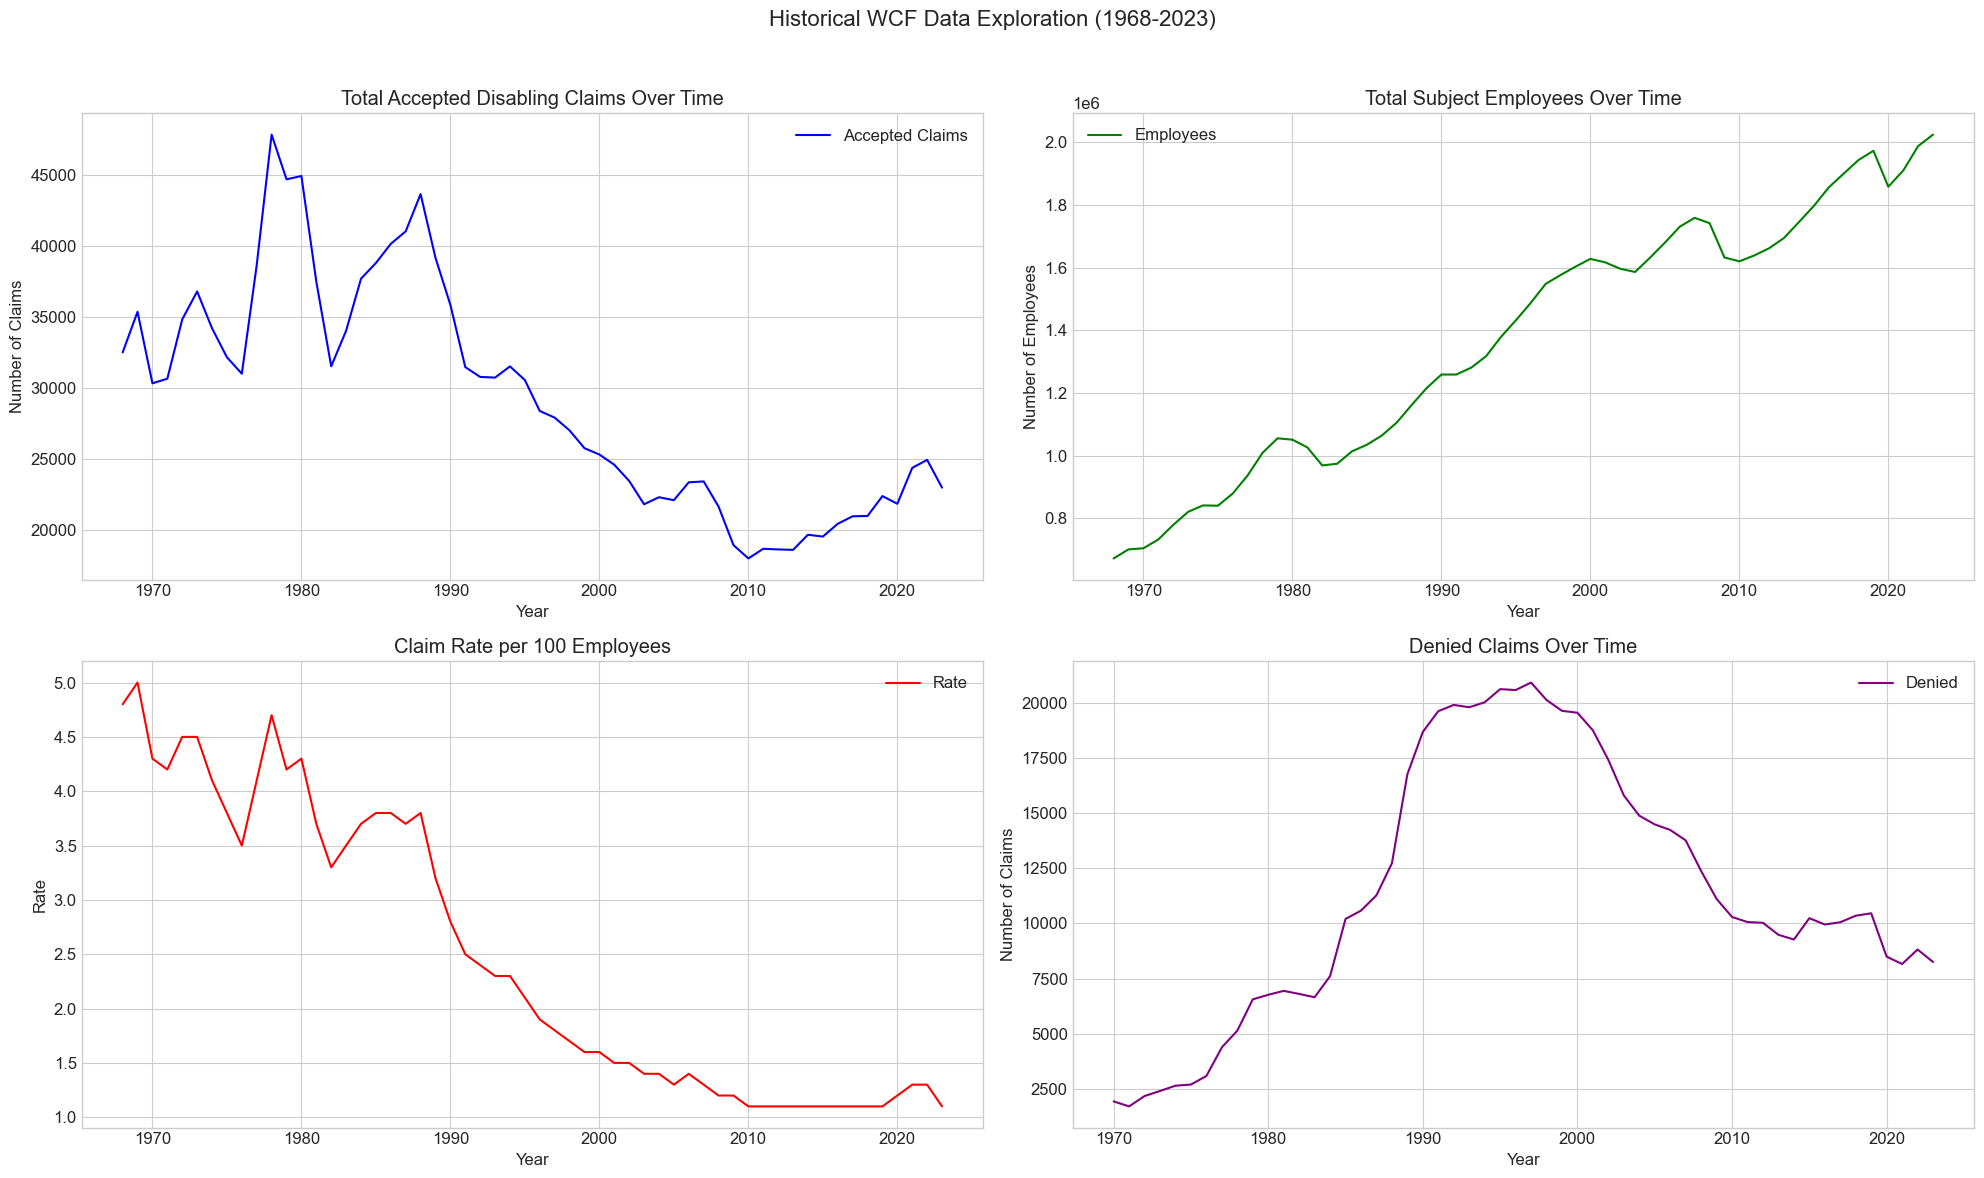

In [5]:
# Let's visualize the core metrics over time.
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Historical WCF Data Exploration (1968-2023)', fontsize=16)

# Plot 1: Accepted Disabling Claims
axes[0, 0].plot(claims['Year'], claims['Accepted disabling claims'], label='Accepted Claims', color='blue')
axes[0, 0].set_title('Total Accepted Disabling Claims Over Time')
axes[0, 0].set_ylabel('Number of Claims')

# Plot 2: Subject Employees
axes[0, 1].plot(claims['Year'], claims['Subject employees'], label='Employees', color='green')
axes[0, 1].set_title('Total Subject Employees Over Time')
axes[0, 1].set_ylabel('Number of Employees')

# Plot 3: Rate of claims per 100 employees
axes[1, 0].plot(claims['Year'], claims['Rate: accepted disabling claims per 100 employees'], label='Rate', color='red')
axes[1, 0].set_title('Claim Rate per 100 Employees')
axes[1, 0].set_ylabel('Rate')

# Plot 4: Denied Claims
axes[1, 1].plot(claims['Year'], claims['Denied claims'], label='Denied', color='purple')
axes[1, 1].set_title('Denied Claims Over Time')
axes[1, 1].set_ylabel('Number of Claims')

for ax in axes.flat:
    ax.set_xlabel('Year')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Step 4: Prepare the Data for Machine Learning
This is often the most time-consuming part of a project. We need to clean the data and engineer features that our model can learn from.
##### 4.1. The Train-Test Split (Time Series Critical Rule)
For time series data, we cannot shuffle the data randomly. We must split it chronologically to simulate a real-world scenario where we use the past to predict the future. We will train our model on data up to a certain point and test it on the years that follow.

In [5]:
# Let's decide on a split year. We'll train on data up to 2018 and test on 2019-2023.
split_year = 2018

# For simplicity and due to missing data, let's filter the dataset to start from 1992
# where the data is more complete.
df_filtered = claims[claims['Year'] >= 1992].copy()

train_df = df_filtered[df_filtered['Year'] <= split_year]
test_df = df_filtered[df_filtered['Year'] > split_year]

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Training data shape: (27, 18)
Test data shape: (5, 18)


##### 4.2. Feature Engineering: Creating Lag Features
To use standard regression models for a time series problem, we transform it by creating "lag" features. This means we will use the data from the previous year to predict the data for the current year.

In [7]:
# Let's select the features we believe will be most predictive
features_to_lag = [
    'Subject employees',
    'Denied claims',
    'Fatality claims',
    'Rate: accepted disabling claims per 100 employees'
    # Removed 'Accepted disabling claims' to avoid duplicate columns
 ]

# The target variable we want to predict
target_col = 'Accepted disabling claims'

# Create a new dataframe for our model
model_df = df_filtered[['Year', target_col] + features_to_lag].copy()

# Create lag features (data from the previous year)
for col in features_to_lag:
    model_df[f'{col}_lag1'] = model_df[col].shift(1)

# Drop rows with NaN values created by the shift operation
model_df.dropna(inplace=True)

print("Dataframe with Lag Features:")
display(model_df.head())

Dataframe with Lag Features:


,Year,Accepted disabling claims,Subject employees,Denied claims,Fatality claims,Rate: accepted disabling claims per 100 employees,Subject employees_lag1,Denied claims_lag1,Fatality claims_lag1,Rate: accepted disabling claims per 100 employees_lag1
25,1993,30741,1317100,19796.0,64,2.3,1280500.0,19902.0,63.0,2.4
26,1994,31530,1378800,20021.0,55,2.3,1317100.0,19796.0,64.0,2.3
27,1995,30564,1431600,20617.0,48,2.1,1378800.0,20021.0,55.0,2.3
28,1996,28389,1487300,20576.0,54,1.9,1431600.0,20617.0,48.0,2.1
29,1997,27922,1547800,20915.0,43,1.8,1487300.0,20576.0,54.0,1.9


To predict Accepted disabling claims for 1993, our model will use the feature values from 1992 (e.g., Accepted disabling claims_lag1, Subject employees_lag1, etc.).

##### 4.3. Finalizing Features (X) and Labels (y)
Now we separate our data into the features (X) our model will learn from, and the target (y) it will try to predict.

In [8]:
# Our features are the lagged columns
feature_cols = [col for col in model_df.columns if '_lag1' in col]
X = model_df[feature_cols]

# Our target is the current year's claims
y = model_df[target_col]

# Split the prepared data into train and test sets
X_train = X[model_df['Year'] <= split_year]
X_test = X[model_df['Year'] > split_year]
y_train = y[model_df['Year'] <= split_year]
y_test = y[model_df['Year'] > split_year]

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (26, 4)
Shape of y_train: (26,)
Shape of X_test: (5, 4)
Shape of y_test: (5,)


##### 4.4. Feature Scaling
Our features have very different scales (e.g., employees in millions, rates close to 1). We need to standardize them so our model treats them equally.

In [9]:
from sklearn.preprocessing import StandardScaler

# IMPORTANT: We fit the scaler ONLY on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# We use the SAME fitted scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

print("First 2 rows of scaled training data:\n", X_train_scaled[:2])

First 2 rows of scaled training data:
 [[-2.30528901  1.09974502  1.94361316  2.23455674]
 [-2.0570837   1.07532573  2.02955523  1.9894155 ]]


##### Step 5: Select and Train a Model
We'll start with a simple model to create a baseline, then try a more complex one.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# --- Model 1: Linear Regression (Baseline) ---
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Evaluate on the training set
lr_train_preds = lr_model.predict(X_train_scaled)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_preds))
print(f"Linear Regression Training RMSE: {lr_train_rmse:.2f} claims")

# --- Model 2: Random Forest (More Powerful) ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate on the training set
rf_train_preds = rf_model.predict(X_train_scaled)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_preds))
print(f"Random Forest Training RMSE: {rf_train_rmse:.2f} claims")

Linear Regression Training RMSE: 756.78 claims
Random Forest Training RMSE: 338.22 claims


#### Step 6: Fine-Tune Your Model
We need a more robust way to evaluate our model than just the training score. For time series, we use TimeSeriesSplit for cross-validation.

In [11]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# TimeSeriesSplit ensures we always train on past data to validate on future data
tscv = TimeSeriesSplit(n_splits=5)

# We will use GridSearchCV to find the best hyperparameters for our Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [1, 2, 3]
}

# NOTE: We use the unscaled training data here, as we will build a pipeline next.
# For now, let's just tune the Random Forest itself.
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=tscv,
                           scoring='neg_root_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters found:", grid_search.best_params_)
print("Best Cross-Validation RMSE: {:.2f} claims".format(-grid_search.best_score_))

# Let's store our best, fine-tuned model
final_model = grid_search.best_estimator_

Best Hyperparameters found: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 50}
Best Cross-Validation RMSE: 2257.78 claims


#### Step 7: Present Your Solution (Evaluate on the Test Set)
Now is the moment of truth. We will use our fine-tuned model, which has never seen data past 2018, to make forecasts for 2019-2023 and see how it performs against the real data.

In [12]:
# Make predictions on the held-out test set
final_predictions = final_model.predict(X_test_scaled)

# Calculate the final RMSE on the test set
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print(f"Final Model Test RMSE: {final_rmse:.2f} claims")

# Create a DataFrame to easily plot the results
results_df = pd.DataFrame({
    'Year': test_df['Year'],
    'Actual_Claims': y_test,
    'Predicted_Claims': final_predictions
})

Final Model Test RMSE: 2450.46 claims


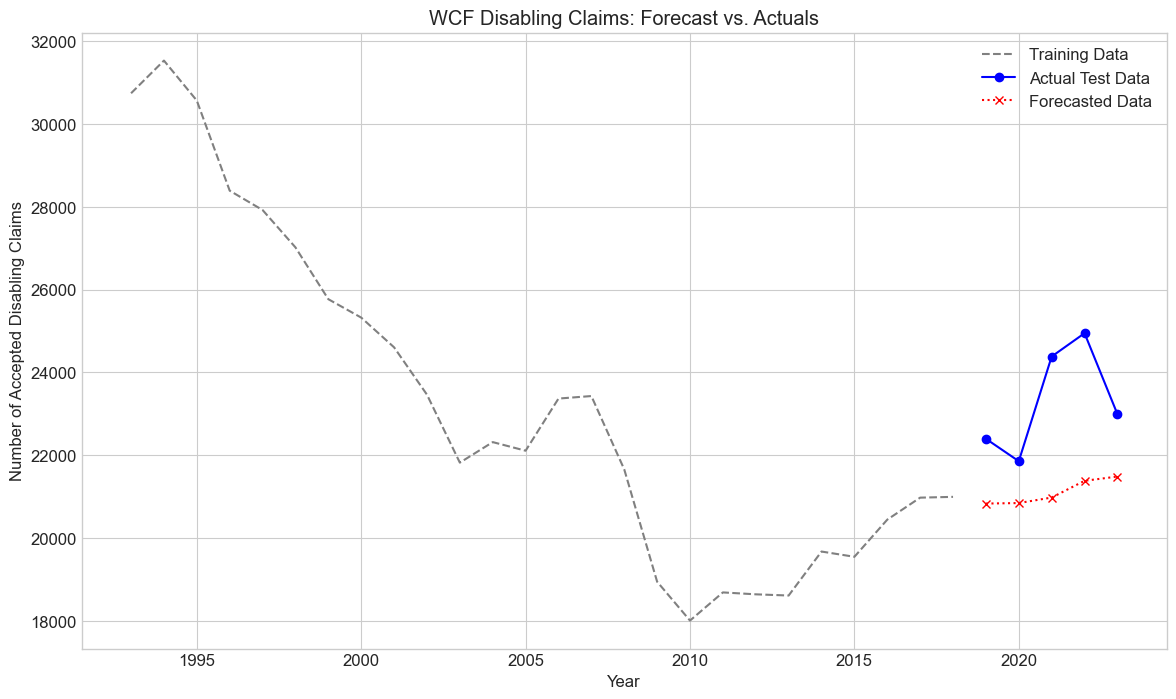

,Year,Actual_Claims,Predicted_Claims
51,2019,22399,20835.570833
52,2020,21858,20847.497500
53,2021,24385,20980.420000
54,2022,24948,21384.751667
55,2023,22994,21487.220000


In [14]:
plt.figure(figsize=(14, 8))
plt.plot(model_df[model_df['Year'] <= split_year]['Year'], y_train, label='Training Data', color='gray', linestyle='--')
plt.plot(results_df['Year'], results_df['Actual_Claims'], label='Actual Test Data', color='blue', marker='o')
plt.plot(results_df['Year'], results_df['Predicted_Claims'], label='Forecasted Data', color='red', marker='x', linestyle=':')

plt.title('WCF Disabling Claims: Forecast vs. Actuals')
plt.xlabel('Year')
plt.ylabel('Number of Accepted Disabling Claims')
plt.legend()
plt.grid(True)
plt.show()

display(results_df)

#### Step 8: Launch, Monitor, and Maintain
The project isn't over once the model is built.
##### 8.1. Launch (Saving the Model)
We need to save our final model so we can use it in a production environment without having to retrain it every time. We'll also save the scaler, as we need it to process new data.

In [20]:
import joblib

# Save the final model and the scaler
joblib.dump(final_model, 'aggregate_claims_forecaster.pkl')
joblib.dump(scaler, 'aggregate_data_scaler.pkl')

print("Model and scaler saved successfully.")

# Example of loading and using the model for a new year's prediction
# loaded_model = joblib.load('aggregate_claims_forecaster.pkl')
# loaded_scaler = joblib.load('aggregate_data_scaler.pkl')
# new_data = ... (this would be the data from the most recent year)
# new_data_scaled = loaded_scaler.transform(new_data)
# forecast = loaded_model.predict(new_data_scaled)
# print(f"Forecast for next year: {forecast[0]:.0f} claims")

Model and scaler saved successfully.


#### 8.2. Monitor and Maintain
- Monitoring: The model's performance should be tracked. At the end of each year, when the actual claim numbers are finalized, we should compare them to our forecast to see if the model's accuracy is degrading (a phenomenon called "model drift").
- Maintenance: We need an automated process.
  1. Collect Data: At the end of each year, add the new, complete data to our historical dataset.
  2. Retrain: Run this entire notebook as a script to automatically retrain the model on the newly updated data.
  3. Deploy: The newly trained model replaces the old one, ready to make a forecast for the next year.


### Improving Accuracy: stronger features, time-series CV, and better tuning

We’ll try a few concrete upgrades:
- Add informative features: include lagged target (Accepted disabling claims) and multi-lag (1–3) for key drivers; add a 3-year rolling mean of claims.
- Use proper time-series cross-validation with an expanded hyperparameter grid.
- Evaluate with both RMSE and MAPE, and compare to a naive baseline.

Then we’ll re-plot the forecast vs. actuals and inspect feature importance.

Naive (lag1) baseline — RMSE: 1598.69, MAPE: 5.97%
Best estimator: GradientBoostingRegressor
Best params: {'model': GradientBoostingRegressor(random_state=42), 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}
CV best RMSE: 1859.77988308053
Improved model — Test RMSE: 2304.02, MAPE: 8.26%


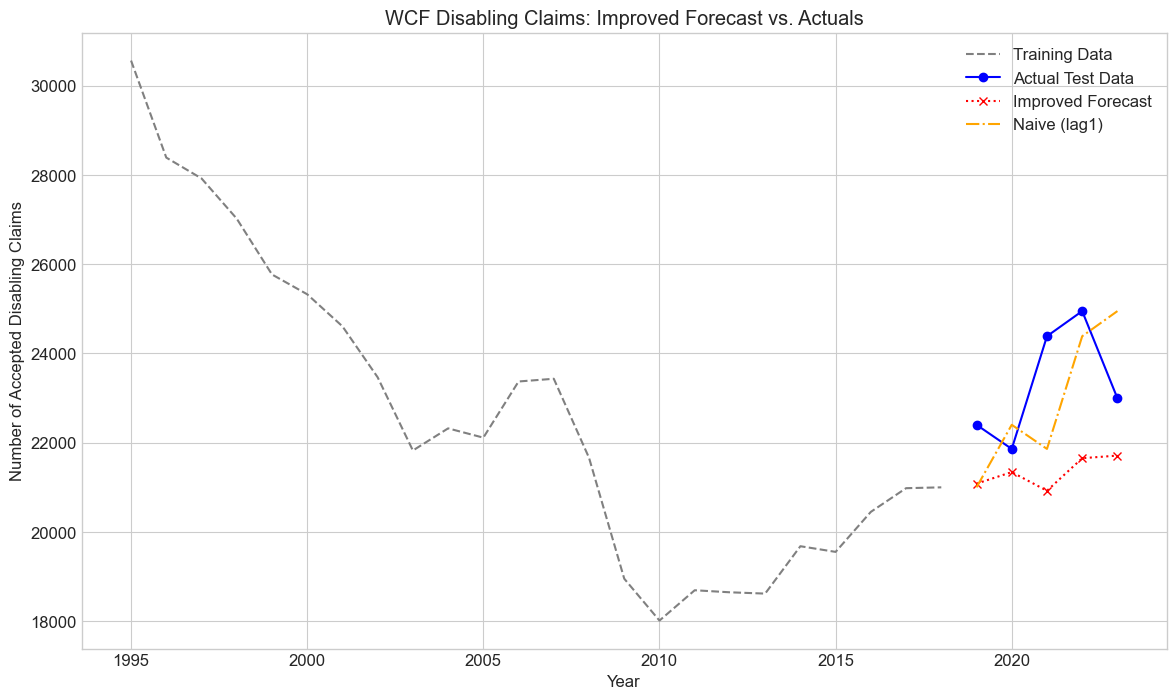

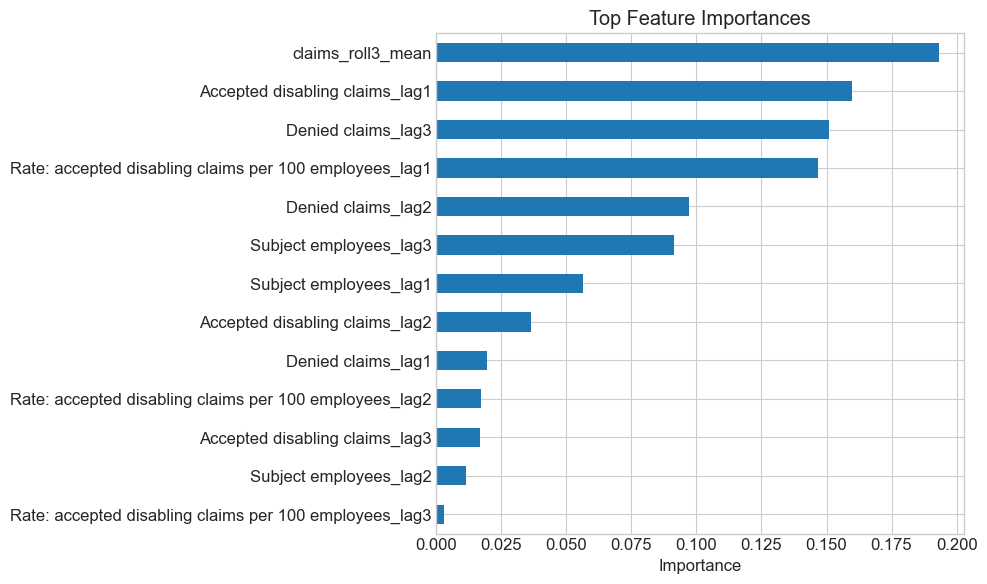


Improved forecast results:


,Year,Actual_Claims,Predicted_Claims,Naive
27,2019,22399,21079.488107,20997.0
28,2020,21858,21338.967921,22399.0
29,2021,24385,20920.230299,21858.0
30,2022,24948,21650.148275,24385.0
31,2023,22994,21708.900904,24948.0


In [15]:
# Build richer features (target lags and multi-lags), tune with time-series CV, and evaluate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Reconstruct a modeling frame from df_filtered to avoid leaking future info
base_cols = ['Year', 'Accepted disabling claims'] + features_to_lag
work = df_filtered[base_cols].copy().reset_index(drop=True)

# Add target lags (1..3)
for lag in [1, 2, 3]:
    work[f'{target_col}_lag{lag}'] = work[target_col].shift(lag)

# Add multi-lags for key drivers (1..3)
drivers = [
    'Subject employees',
    'Denied claims',
    'Rate: accepted disabling claims per 100 employees',
]
for col in drivers:
    for lag in [1, 2, 3]:
        work[f'{col}_lag{lag}'] = work[col].shift(lag)

# Rolling stats on the target (use past-only windows)
work['claims_roll3_mean'] = work[target_col].shift(1).rolling(window=3, min_periods=2).mean()

# Drop rows with NaNs from lags
work = work.dropna().copy()

# Feature list (exclude raw contemporaneous features to avoid peeking)
feature_cols2 = [c for c in work.columns if c not in ['Year', target_col] and ('_lag' in c or 'roll' in c)]
X2 = work[feature_cols2]
y2 = work[target_col]

# Align to the same split_year
train_mask = work['Year'] <= split_year
X2_train, X2_test = X2[train_mask], X2[~train_mask]
y2_train, y2_test = y2[train_mask], y2[~train_mask]

# Baseline: naive last-value (lag1) where available
naive_pred = work.loc[~train_mask, f'{target_col}_lag1']
naive_rmse = np.sqrt(mean_squared_error(y2_test, naive_pred))
naive_mape = mean_absolute_percentage_error(y2_test, naive_pred)
print(f'Naive (lag1) baseline — RMSE: {naive_rmse:.2f}, MAPE: {naive_mape:.2%}')

# 2) Pipeline: scale numeric features then model
numeric_features = feature_cols2
preprocess = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_features)],
    remainder='drop'
)

rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

pipe = Pipeline([
    ('prep', preprocess),
    ('model', rf)
])

# 3) Time-series CV and broader search
tscv = TimeSeriesSplit(n_splits=5)
param_grid = [
    {
        'model': [RandomForestRegressor(random_state=42)],
        'model__n_estimators': [200, 400, 800],
        'model__max_depth': [None, 8, 12],
        'model__min_samples_leaf': [1, 2, 4],
        'model__max_features': ['sqrt', 0.5]
    },
    {
        'model': [GradientBoostingRegressor(random_state=42)],
        'model__n_estimators': [200, 400],
        'model__learning_rate': [0.03, 0.05, 0.1],
        'model__max_depth': [2, 3],
        'model__subsample': [0.8, 1.0]
    }
]

search = GridSearchCV(
    pipe,
    param_grid,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    refit=True,
)
search.fit(X2_train, y2_train)

print('Best estimator:', type(search.best_estimator_.named_steps['model']).__name__)
print('Best params:', search.best_params_)
print('CV best RMSE:', -search.best_score_)

# 4) Evaluate on test
best_model = search.best_estimator_
final_pred = best_model.predict(X2_test)
rmse = np.sqrt(mean_squared_error(y2_test, final_pred))
mape = mean_absolute_percentage_error(y2_test, final_pred)
print(f'Improved model — Test RMSE: {rmse:.2f}, MAPE: {mape:.2%}')

# 5) Plot vs actuals with training context
plot_df = pd.DataFrame({
    'Year': work.loc[~train_mask, 'Year'],
    'Actual_Claims': y2_test.values,
    'Predicted_Claims': final_pred,
    'Naive': naive_pred.values
})

plt.figure(figsize=(14, 8))
plt.plot(work.loc[train_mask, 'Year'], y2_train, label='Training Data', color='gray', linestyle='--')
plt.plot(plot_df['Year'], plot_df['Actual_Claims'], label='Actual Test Data', color='blue', marker='o')
plt.plot(plot_df['Year'], plot_df['Predicted_Claims'], label='Improved Forecast', color='red', marker='x', linestyle=':')
plt.plot(plot_df['Year'], plot_df['Naive'], label='Naive (lag1)', color='orange', linestyle='-.')
plt.title('WCF Disabling Claims: Improved Forecast vs. Actuals')
plt.xlabel('Year')
plt.ylabel('Number of Accepted Disabling Claims')
plt.legend()
plt.grid(True)
plt.show()

# 6) Feature importance (for tree models)
model_step = best_model.named_steps['model']
if hasattr(model_step, 'feature_importances_'):
    importances = pd.Series(model_step.feature_importances_, index=numeric_features).sort_values(ascending=False).head(15)
    ax = importances[::-1].plot(kind='barh', figsize=(10, 6), title='Top Feature Importances')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

# Pack results for inspection
improved_results_df = plot_df.copy()
print('\nImproved forecast results:')
display(improved_results_df)

In [16]:
# Diagnostics: quick summary of accuracy vs baseline
try:
    imp = (float(naive_rmse) - float(rmse)) / float(naive_rmse) if float(naive_rmse) > 0 else 0.0
    mdl = type(best_model.named_steps['model']).__name__ if 'best_model' in globals() else 'N/A'
    print('Model:', mdl)
    print(f'Naive baseline — RMSE: {float(naive_rmse):.2f}, MAPE: {float(naive_mape):.2%}')
    print(f'Improved model — RMSE: {float(rmse):.2f}, MAPE: {float(mape):.2%}')
    print(f'Improvement vs baseline (RMSE): {imp:.1%}')
except Exception as e:
    print('Diagnostics error:', e)

Model: GradientBoostingRegressor
Naive baseline — RMSE: 1598.69, MAPE: 5.97%
Improved model — RMSE: 2304.02, MAPE: 8.26%
Improvement vs baseline (RMSE): -44.1%


### Log-transform target experiment (Ridge/ElasticNet + trees)

We’ll model log1p(claims) to stabilize variance and test Ridge/ElasticNet alongside tree models, using time-series CV. Metrics are back-transformed to the original scale.

Best (log-space) model: Ridge
Best CV RMSE: 1591.2044212433796
Log/TTR model — Test RMSE: 3470.49, MAPE: 13.46%
Improvement vs baseline (RMSE): -117.1%


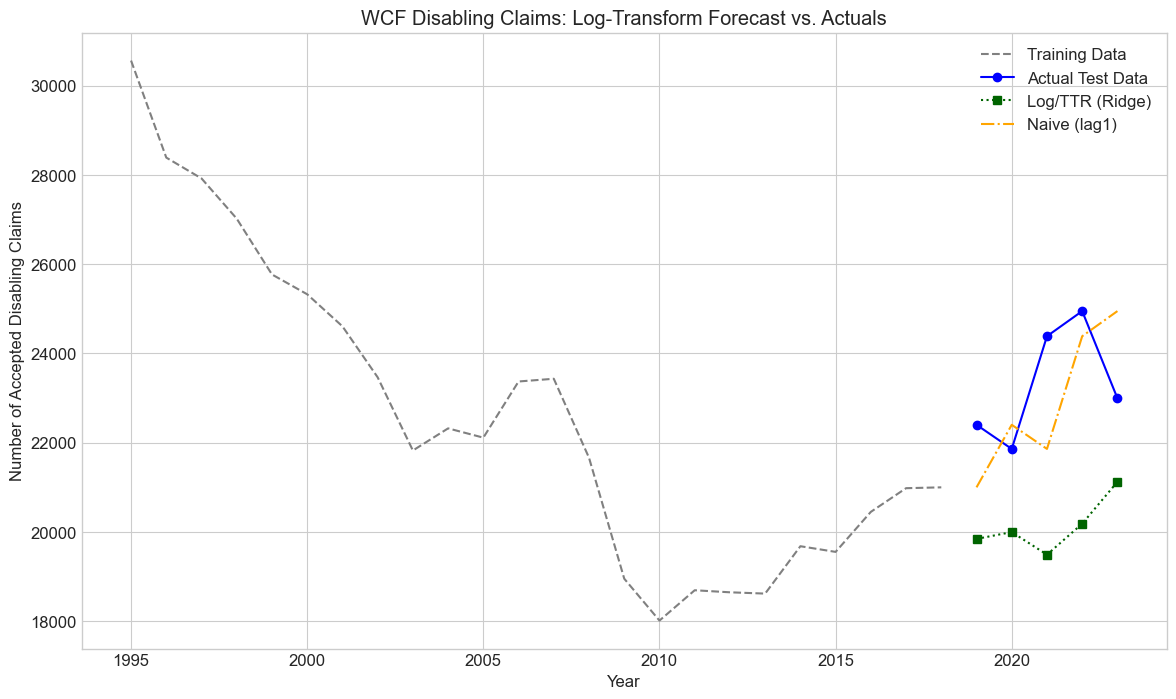

,Year,Actual_Claims,Predicted_Claims,Naive
27,2019,22399,19841.109759,20997.0
28,2020,21858,19994.074911,22399.0
29,2021,24385,19487.862456,21858.0
30,2022,24948,20182.116699,24385.0
31,2023,22994,21120.795461,24948.0


In [17]:
# Log-transform target modeling with multiple estimators and TTR
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge, ElasticNet

# Reuse X2_train/X2_test/y2_train/y2_test, numeric_features, preprocess, tscv
log = FunctionTransformer(np.log1p, validate=False)
ilog = FunctionTransformer(np.expm1, validate=False)

base_pipe = Pipeline([
    ('prep', preprocess),
    ('model', Ridge())
])

models = [
    ('Ridge', Ridge()),
    ('ElasticNet', ElasticNet(max_iter=5000)),
    ('GB', GradientBoostingRegressor(random_state=42)),
    ('RF', RandomForestRegressor(random_state=42))
]

searches = {}
for name, estimator in models:
    ttr = TransformedTargetRegressor(regressor=Pipeline([('prep', preprocess), ('model', estimator)]),
                                     func=np.log1p, inverse_func=np.expm1)
    if name == 'Ridge':
        grid = {'regressor__model__alpha': [0.1, 1.0, 10.0]}
    elif name == 'ElasticNet':
        grid = {'regressor__model__alpha': [0.01, 0.1, 1.0], 'regressor__model__l1_ratio': [0.1, 0.5, 0.9]}
    elif name == 'GB':
        grid = {'regressor__model__n_estimators': [400, 800], 'regressor__model__learning_rate': [0.03, 0.06], 'regressor__model__max_depth': [2, 3]}
    else:  # RF
        grid = {'regressor__model__n_estimators': [400, 800], 'regressor__model__max_depth': [None, 10], 'regressor__model__min_samples_leaf': [1, 2]}

    gs = GridSearchCV(ttr, grid, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1, refit=True)
    gs.fit(X2_train, y2_train)
    searches[name] = gs

# Evaluate best across models
best_name, best_search = min(searches.items(), key=lambda kv: -kv[1].best_score_)
log_pred = best_search.best_estimator_.predict(X2_test)
log_rmse = np.sqrt(mean_squared_error(y2_test, log_pred))
log_mape = mean_absolute_percentage_error(y2_test, log_pred)

print('Best (log-space) model:', best_name)
print('Best CV RMSE:', -best_search.best_score_)
print(f'Log/TTR model — Test RMSE: {log_rmse:.2f}, MAPE: {log_mape:.2%}')

# Compare to naive
imp_log = (float(naive_rmse) - float(log_rmse)) / float(naive_rmse) if float(naive_rmse) > 0 else 0.0
print(f'Improvement vs baseline (RMSE): {imp_log:.1%}')

# Plot
log_plot_df = pd.DataFrame({
    'Year': work.loc[~train_mask, 'Year'],
    'Actual_Claims': y2_test.values,
    'Predicted_Claims': log_pred,
    'Naive': naive_pred.values
})
plt.figure(figsize=(14, 8))
plt.plot(work.loc[train_mask, 'Year'], y2_train, label='Training Data', color='gray', linestyle='--')
plt.plot(log_plot_df['Year'], log_plot_df['Actual_Claims'], label='Actual Test Data', color='blue', marker='o')
plt.plot(log_plot_df['Year'], log_plot_df['Predicted_Claims'], label=f'Log/TTR ({best_name})', color='darkgreen', marker='s', linestyle=':')
plt.plot(log_plot_df['Year'], log_plot_df['Naive'], label='Naive (lag1)', color='orange', linestyle='-.')
plt.title('WCF Disabling Claims: Log-Transform Forecast vs. Actuals')
plt.xlabel('Year')
plt.ylabel('Number of Accepted Disabling Claims')
plt.legend()
plt.grid(True)
plt.show()

display(log_plot_df)

### Trend and rolling features + univariate Holt baseline

We’ll add trend and piecewise-trend features, rolling stats on drivers (past-only), and compare tree models to a univariate Holt’s linear trend baseline.

Naive (lag1) baseline — RMSE: 1598.69, MAPE: 5.97%
Holt baseline — RMSE: 3595.79, MAPE: 13.83%


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Best tree params: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 400}
CV best RMSE: 1460.472237781401
Expanded-features RF — Test RMSE: 2881.95, MAPE: 11.11%


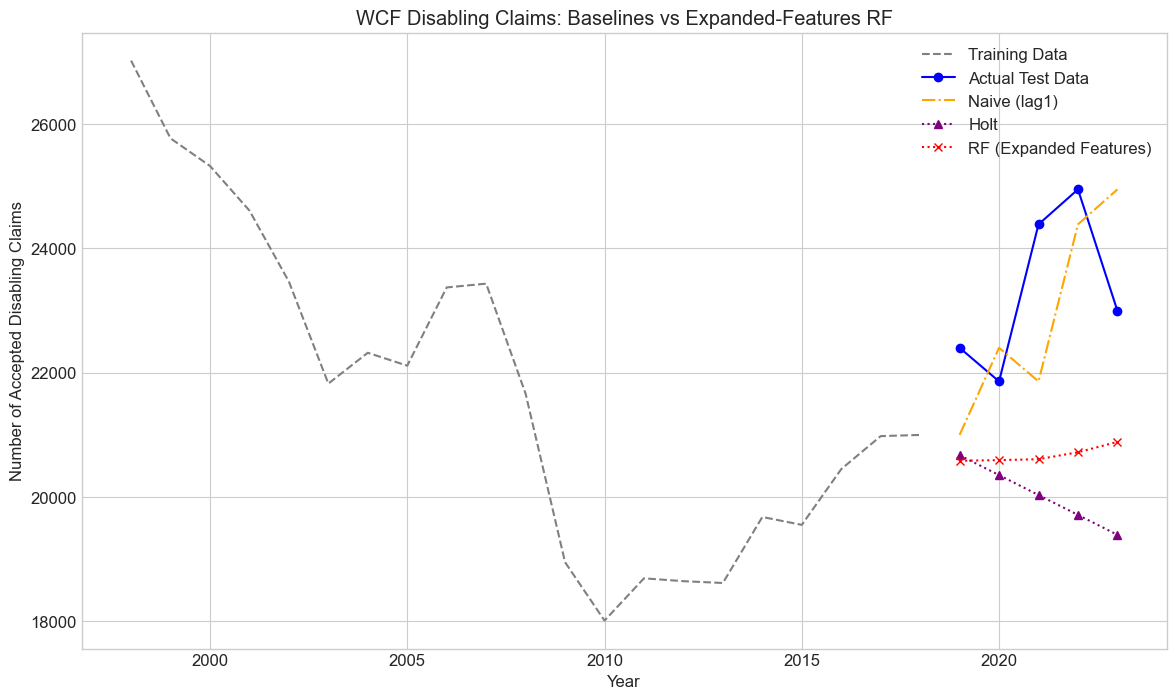


Comparison table:


,Year,Actual_Claims,RF_Expanded,Holt,Naive
27,2019,22399,20581.1875,20670.580794,20997.0
28,2020,21858,20591.6850,20350.424288,22399.0
29,2021,24385,20606.2800,20030.267783,21858.0
30,2022,24948,20718.1575,19710.111278,24385.0
31,2023,22994,20884.5575,19389.954773,24948.0


In [18]:
# Add trend/rolling driver features and compare with Holt baseline
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Copy from prior work DF and extend features
w2 = work.copy()

# Trend features
w2['t'] = np.arange(len(w2))
w2['t2'] = w2['t'] ** 2

# Optional breakpoint (feel free to change year based on domain knowledge)
break_year = 2008
w2['post_break'] = (w2['Year'] > break_year).astype(int)
w2['t_post'] = w2['t'] * w2['post_break']

# Rolling stats for key drivers (past-only)
for col in drivers:
    w2[f'{col}_roll3_mean'] = w2[col].shift(1).rolling(3, min_periods=2).mean()
    w2[f'{col}_roll5_mean'] = w2[col].shift(1).rolling(5, min_periods=3).mean()
    w2[f'{col}_roll3_std'] = w2[col].shift(1).rolling(3, min_periods=2).std()

# Drop rows with new NaNs
w2 = w2.dropna().copy()

# Features include previous lagged features + new trend/rolling ones
feature_cols3 = [c for c in w2.columns if c not in ['Year', target_col] and ('_lag' in c or 'roll' in c or c in ['t','t2','post_break','t_post'])]
X3 = w2[feature_cols3]
y3 = w2[target_col]
train_mask2 = w2['Year'] <= split_year
X3_train, X3_test = X3[train_mask2], X3[~train_mask2]
y3_train, y3_test = y3[train_mask2], y3[~train_mask2]

# Recompute naive baseline aligned to w2
naive2 = w2.loc[~train_mask2, f'{target_col}_lag1']
naive2_rmse = np.sqrt(mean_squared_error(y3_test, naive2))
naive2_mape = mean_absolute_percentage_error(y3_test, naive2)
print(f'Naive (lag1) baseline — RMSE: {naive2_rmse:.2f}, MAPE: {naive2_mape:.2%}')

# Holt’s linear trend baseline (univariate, trained on train segment)
holt_model = ExponentialSmoothing(y3_train, trend='add', seasonal=None, initialization_method='estimated')
holt_fit = holt_model.fit(optimized=True)
holt_pred = holt_fit.forecast(len(y3_test))
holt_rmse = np.sqrt(mean_squared_error(y3_test, holt_pred))
holt_mape = mean_absolute_percentage_error(y3_test, holt_pred)
print(f'Holt baseline — RMSE: {holt_rmse:.2f}, MAPE: {holt_mape:.2%}')

# Tree model with expanded features
pipe3 = Pipeline([
    ('prep', ColumnTransformer([('num', StandardScaler(), feature_cols3)], remainder='drop')),
    ('model', RandomForestRegressor(random_state=42))
])

param_grid3 = {
    'model__n_estimators': [400, 800],
    'model__max_depth': [None, 12],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt', 0.5]
}

search3 = GridSearchCV(pipe3, param_grid3, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1, refit=True)
search3.fit(X3_train, y3_train)
print('Best tree params:', search3.best_params_)
print('CV best RMSE:', -search3.best_score_)

x3_pred = search3.best_estimator_.predict(X3_test)
x3_rmse = np.sqrt(mean_squared_error(y3_test, x3_pred))
x3_mape = mean_absolute_percentage_error(y3_test, x3_pred)
print(f'Expanded-features RF — Test RMSE: {x3_rmse:.2f}, MAPE: {x3_mape:.2%}')

# Compare all three on plot
cmp_df = pd.DataFrame({
    'Year': w2.loc[~train_mask2, 'Year'],
    'Actual_Claims': y3_test.values,
    'RF_Expanded': x3_pred,
    'Holt': holt_pred.values,
    'Naive': naive2.values
})

plt.figure(figsize=(14, 8))
plt.plot(w2.loc[train_mask2, 'Year'], y3_train, label='Training Data', color='gray', linestyle='--')
plt.plot(cmp_df['Year'], cmp_df['Actual_Claims'], label='Actual Test Data', color='blue', marker='o')
plt.plot(cmp_df['Year'], cmp_df['Naive'], label='Naive (lag1)', color='orange', linestyle='-.')
plt.plot(cmp_df['Year'], cmp_df['Holt'], label='Holt', color='purple', marker='^', linestyle=':')
plt.plot(cmp_df['Year'], cmp_df['RF_Expanded'], label='RF (Expanded Features)', color='red', marker='x', linestyle=':')
plt.title('WCF Disabling Claims: Baselines vs Expanded-Features RF')
plt.xlabel('Year')
plt.ylabel('Number of Accepted Disabling Claims')
plt.legend()
plt.grid(True)
plt.show()

print('\nComparison table:')
display(cmp_df)